In [22]:
import numpy as np
import pandas as pd
import skimage.io as sio

import diff_classifier.aws as aws
import diff_register.register as reg
import diff_register.im_process as imp

One of the key features of diff_register is extracting cellular properties from input images. This demo notebook will show how to extract cellular properties without incorporating any accompanying multi-particle tracking datasets.

As an example dataset, I have included a large tif image of a DAPI stain in a brain slice from which we would like to extract cellular features. As DAPI stains cell nuclei, and cell nuclei are round, the resulting branch/process features won't be very informative, but users can see how they would be used

In [2]:
cprefix = 'S1_NUC'
cfile = '{}.tif'.format(cprefix)
cfolder = 'Tissue_Studies/04_23_18_Registration_Test'

#aws.download_s3('{}/{}'.format(cfolder, cfile), cfile, bucket_name='ccurtis.data')

cim = sio.imread(cfile)

pxrat_cells = 1.24
pxrat_traj = 0.16
dim_traj = 2048
dim_cells = int(np.round(dim_traj*pxrat_traj/pxrat_cells, decimals=0))

Users can use the skimage.io toolbox to preview the image. This tilescan image is fairly large. If users want to view a subset of the image, they can use the indices of the image to zoom in.

/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


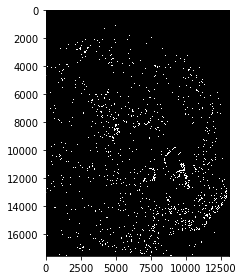

In [17]:
sio.imshow(cim)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


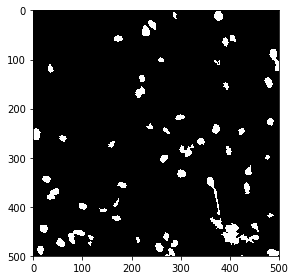

In [18]:
sio.imshow(cim[6500:7000, 6500:7000])

In [13]:
sio.imsave('small_image.tif', cim[6500:7000, 6500:7000])

diff_register can be run directly on large tilescans, but it is a good idea to optimize image processing parameters on a smaller image first. Try running skeleton_image on the small image from above.

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


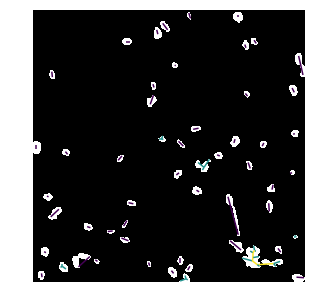

In [19]:
skel = imp.skeleton_image('.', 'small_image.tif', 50, 50, show=True, imname='skel_small.tif',
                   channel=None, figsize=(5, 5))

In [20]:
Dfeatures = imp.mglia_features(skel)

In [21]:
Dfeatures

,X,Y,area,average_branch,eccentricity,inertia_tensor,label,main_branch,moments,perimeter,solidity,total_branches
0,12.073579,376.471572,299.0,4.828427,0.393410,"[[22.7709309739, -1.61078735137], [-1.61078735...",1,4.828427,"[[299.0, 2713.0, 32145.0, 428251.0], [2832.0, ...",62.284271,0.980328,1
1,10.260274,287.164384,73.0,11.242641,0.894944,"[[3.53462188028, -2.97091386752], [-2.97091386...",2,11.242641,"[[73.0, 457.0, 3753.0, 34987.0], [231.0, 1663....",33.313708,0.960526,1
2,29.511111,242.053333,225.0,16.313708,0.860772,"[[19.8282666667, -12.994962963], [-12.99496296...",3,16.313708,"[[225.0, 2140.0, 26048.0, 357940.0], [1812.0, ...",59.112698,0.945378,1
3,42.526316,228.763158,266.0,8.828427,0.680715,"[[16.2108231104, -2.12465373961], [-2.12465373...",4,8.828427,"[[266.0, 3066.0, 43118.0, 669006.0], [1799.0, ...",60.284271,0.977941,1
4,57.430052,172.476684,193.0,8.828427,0.676682,"[[20.9126687965, 0.204998791914], [0.204998791...",5,8.828427,"[[193.0, 1241.0, 10169.0, 93377.0], [1636.0, 1...",50.627417,0.960199,1
5,57.259542,405.595420,131.0,9.071068,0.670796,"[[10.6836431443, -3.2195093526], [-3.219509352...",6,9.071068,"[[131.0, 820.0, 6688.0, 60544.0], [733.0, 5010...",42.142136,0.935714,1
6,63.931677,390.975155,161.0,8.828427,0.758787,"[[8.96832683924, -2.44550750357], [-2.44550750...",7,8.828427,"[[161.0, 1277.0, 13235.0, 154931.0], [962.0, 8...",46.970563,0.964072,1
7,98.861842,490.914474,456.0,39.142136,0.965970,"[[23.2975098107, -41.900464566], [-41.90046456...",8,39.142136,"[[456.0, 9057.0, 253613.0, 8257863.0], [4521.0...",114.183766,0.766387,1
8,100.968085,260.308511,94.0,2.414214,0.563467,"[[9.00056586691, -0.584314169307], [-0.5843141...",9,2.414214,"[[94.0, 467.0, 2917.0, 20213.0], [499.0, 2534....",33.556349,0.969072,1
9,118.641379,35.027586,145.0,11.242641,0.771575,"[[7.83372175981, -2.09954815696], [-2.09954815...",11,11.242641,"[[145.0, 1253.0, 13423.0, 159557.0], [729.0, 6...",44.384776,0.960265,1


The output of mglia_features is a pandas dataframe containing all the features of individual cells. Users can perform analyses directly on this data. For example, users can calculate average area of a cell, or the total number of cells:

In [29]:
print('Average cell nuclei area: {} +/- {}'.format(np.round(np.mean(Dfeatures['area']), 1),
                                                   np.round(np.std(Dfeatures['area']), 1)))
print('Cell count : {}'.format(Dfeatures.shape[0]))

Average cell nuclei area: 215.5 +/- 182.5
Cell count : 54
